In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [6]:
%matplotlib inline

In [7]:
digit = load_digits()

In [8]:
from IPython.display import Image

In [9]:
data = digit.images
target = digit.target

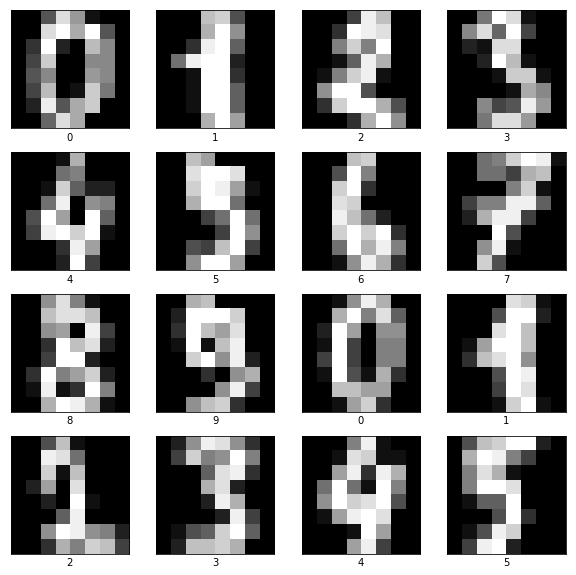

In [11]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i],cmap = "gray")
    plt.xlabel(target[i])
plt.show()

In [12]:
print("Data shape is: ",data.shape)
print("Target shape is ",target.shape)

Data shape is:  (1797, 8, 8)
Target shape is  (1797,)


In [13]:
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
data = data.reshape((1797,64, ))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
# Scaling the input using MinMaxScaler

minMaxScaler = MinMaxScaler()
X = minMaxScaler.fit_transform(data)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size = .40,random_state = 40)

In [23]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (1078, 64)
X_test shape is  (719, 64)
y_train shape is  (1078,)
y_test shape is  (719,)


In [24]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
pred = lg.predict(X_test)

In [26]:
print("Classification Report------------------------------------------------------------------------------")
print(classification_report(y_test,pred))

Classification Report------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       0.92      0.88      0.90        81
           2       0.99      0.99      0.99        70
           3       0.97      0.97      0.97        69
           4       1.00      0.93      0.96        71
           5       0.97      0.97      0.97        60
           6       0.95      0.97      0.96        72
           7       0.90      0.99      0.94        71
           8       0.90      0.90      0.90        78
           9       0.92      0.89      0.91        76

   micro avg       0.95      0.95      0.95       719
   macro avg       0.95      0.95      0.95       719
weighted avg       0.95      0.95      0.95       719



In [27]:
print("Accuracy Score----------------------------------------------------------------------------------------")
print(accuracy_score(y_test,pred))

Accuracy Score----------------------------------------------------------------------------------------
0.9457579972183588


Confusion Matrix---------------------------------------------------------------------------------------


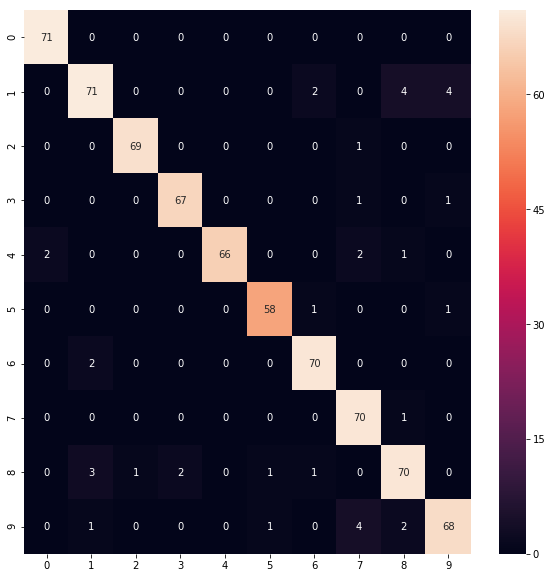

In [28]:
print("Confusion Matrix---------------------------------------------------------------------------------------")
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [29]:
pd.DataFrame({'Actual':y_test,'Predicted' : pred}).head(100)

,Actual,Predicted
0,8,8
1,1,1
2,9,9
3,0,0
4,3,3
5,3,3
6,2,2
7,7,7
8,3,9
9,9,9
